# Data Visualization Project

## Data analysis of Global temperature, Natural disasters and economic damage

## Introduction
<p>
Climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We can visulize the change in global temperature over years across the world with the help of exploratory data analysis.
    </p>
<p>
Along with the globaltemperature dataset, we shall use Disaster events dataset and economic damage due to the disaster dataset.
We can prove that the globaltemperature change has an adverse effect on the occurence of natural disasters.
    </p>
    <p> The source of the global temperature data is the <a href="https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data">Kaggle</a> dataset. The Berkeley Earth averaging process generates a variety of Output data including a set of gridded temperature fields, regional averages, and bias-corrected station data.<br/> Natural diasaster data is taken from <a href='https://ourworldindata.org/natural-disasters'>OurWorldinData</a>
    </p>
    
 <p>
    Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

    Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and 
    land temperatures
    LandAverageTemperature: global average land temperature in celsius
    LandAverageTemperatureUncertainty: the 95% confidence interval around the average
    LandMaxTemperature: global average maximum land temperature in celsius
    LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
    LandMinTemperature: global average minimum land temperature in celsius
    LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
    LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
    LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and 
    ocean temperature
</p>
<p> Number of natural disaster events (number-of-natural-disaster-events.csv):
    
    Entity: Type of disaster
    Year: year in which the disaster occured
    Number of reported natural disasters (reported disasters): Number of times the disaster occured all over the world
    
</p>
<p> Economic damage from natural disaster(economic-damage-from-natural-disasters.csv):
    
    Total economic damage from natural disasters (US$) : Loss of amount in US dollars
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
globaltempcountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
globaltemp = pd.read_csv('GlobalTemperatures.csv')

In [3]:
globaltempcountry.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
globaltemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Average temperature changes over the years 

Text(0.5, 0, 'year')

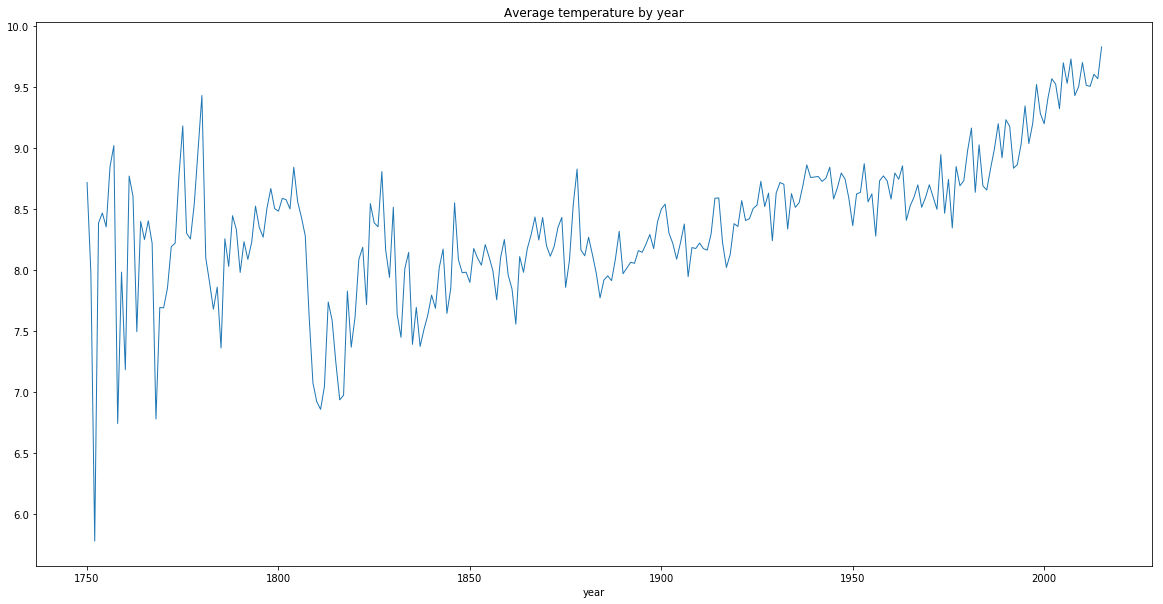

In [5]:
globaltemp['dt'] = pd.to_datetime(globaltemp['dt'])
globaltemp['year'] = globaltemp['dt'].map(lambda x: x.year)

year_temp = globaltemp.groupby(globaltemp.year).mean()
year_temp.LandAverageTemperature.plot(linewidth=1,figsize=(20, 10))
plt.title('Average temperature by year')
plt.xlabel('year')


The above plot depicts the average temperature rise from the year 1750 to 2013. From the plot, it is evident that there is a significant rise in temperature over the period.It clearly indicates the warming of Earth. The warming is more pronounced from about 1920 onwards. In 2015, the Earth is 0.76 degree Celsius warmer than the normal. The result above confirms the scientific consensus that the Earth is warming.

## Average temperature variation in each season by year

Created a new column with date and time <br/>
Create a new column 'Season' of every month <br/>
Group the data based on the year and find out the average temperature for every season

In [6]:
#Select the required columns
land_avgtemp = globaltemp[['dt','LandAverageTemperature']]
land_avgtemp['dt'] = pd.to_datetime(land_avgtemp['dt'])
land_avgtemp['year'] = land_avgtemp['dt'].map(lambda x: x.year)
land_avgtemp['month'] = land_avgtemp['dt'].map(lambda x: x.month)

#Lambda function to find the season
season = lambda month : 'spring' if month >= 3 and month <= 5 else ('summer' if month >= 6 and month <= 8 else('autumn' if month >= 9 and month <= 11 else 'winter'))

min_year = land_avgtemp['year'].min()
max_year = land_avgtemp['year'].max()
years = range(min_year, max_year + 1)

land_avgtemp['season'] = land_avgtemp['month'].apply(season)

spring_temps = [];summer_temps = [];autumn_temps = [];winter_temps = []
for year in years:
    data_year = land_avgtemp[land_avgtemp['year'] == year]
    spring_temps.append(data_year[data_year['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(data_year[data_year['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(data_year[data_year['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(data_year[data_year['season'] == 'winter']['LandAverageTemperature'].mean())

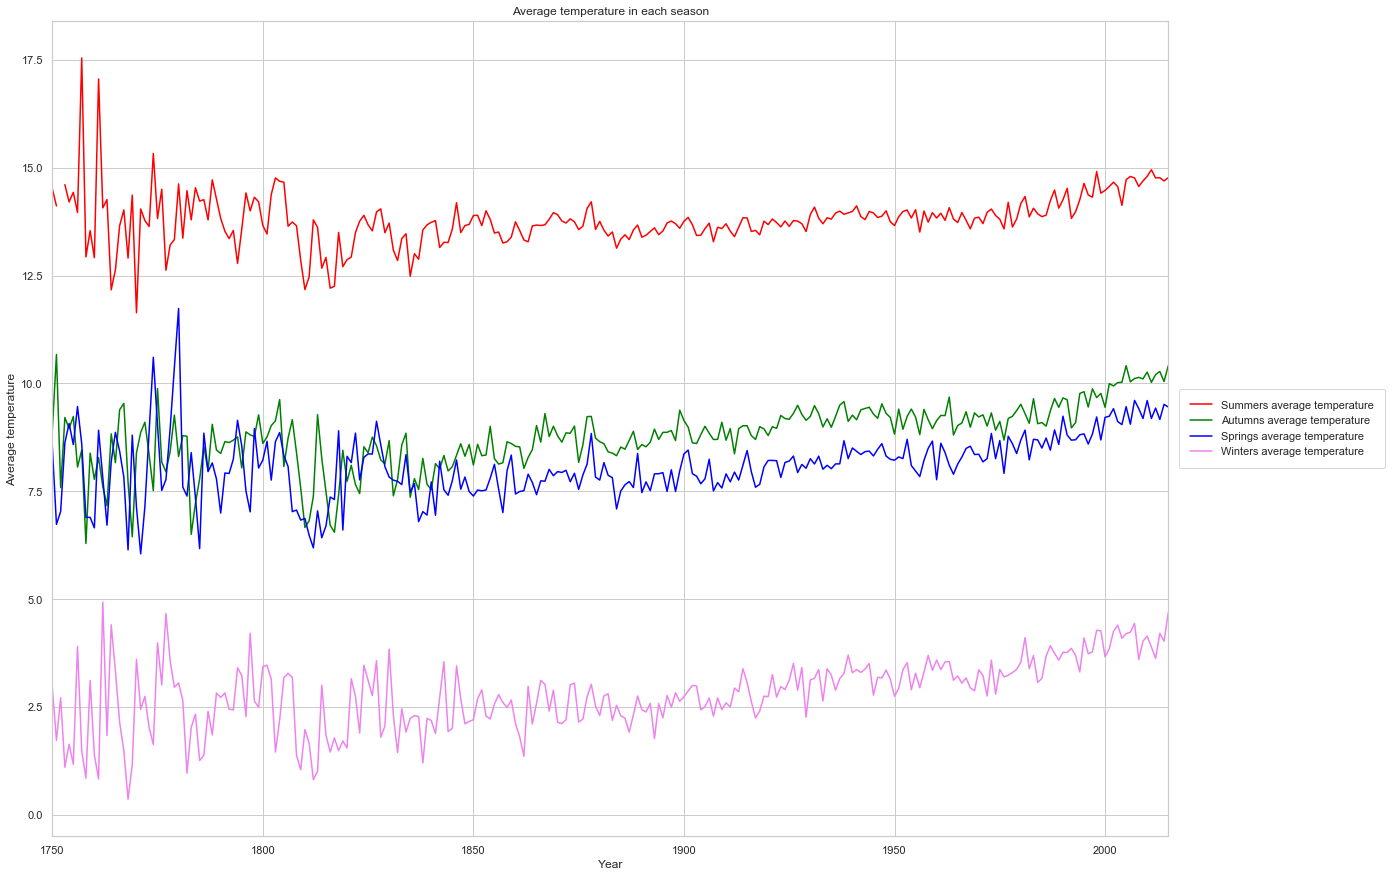

In [7]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(20, 15))

plt.plot(years, summer_temps, label='Summers average temperature', color='red')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='green')
plt.plot(years, spring_temps, label='Springs average temperature', color='blue')
plt.plot(years, winter_temps, label='Winters average temperature', color='violet')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

The above plot depicts the temperature change in each season from 1750 to 2015. The average temperature is increasing from 1900 except for some sharp variations from year 1750 to 1800. It shows similar trend of avg temperature over years (the previous plot)

## Average temperature in countries

In [8]:
global_temp_country = globaltempcountry[~globaltempcountry['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country = global_temp_country.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])


countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 0.5, height = 0)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    showlegend = True,
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        xaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        yaxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )


fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


The above figure is an interactive geographical map which shows the average temperature across all the countries in the world. We can see that some of the countries in Africa and Middle East has recorded high temperatures of 28 degree C whereas Greenland has very low temperature of -20 degree C.

## Barplot to show the top most world's hot and cold countries

Text(0, 0.5, 'Country')

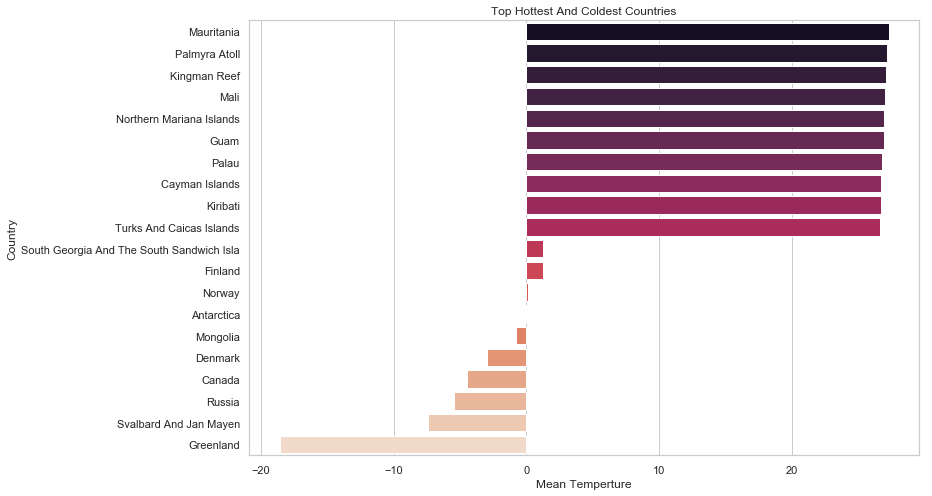

In [63]:
globaltempcountry['Country'].replace({'Denmark (Europe)':'Denmark','France (Europe)':'France','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'Europe'},inplace=True)
globaltempcountry.fillna(0,inplace=True)
temp_country=globaltempcountry.groupby(['Country'])['AverageTemperature'].mean().reset_index()

hot=temp_country.sort_values(by='AverageTemperature',ascending=False)[:10]
cold=temp_country.sort_values(by='AverageTemperature',ascending=True)[:10]
top_countries=pd.concat([hot,cold])
top_countries.sort_values('AverageTemperature',ascending=False,inplace=True)

f,ax=plt.subplots(figsize=(12,8))
sns.barplot(y='Country',x='AverageTemperature',data=top_countries,palette='rocket',ax=ax).set_title('Top Hottest And Coldest Countries')
plt.xlabel('Mean Temperture')
plt.ylabel('Country')


The above barplot shows the top most hottest and coldest countries in terms of average temperature.

## Average Temperature of cities in France from the year 1750 to 2013

In [64]:
globaltempcity = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [65]:
fr_tempdata = globaltempcity[globaltempcity['Country'] == 'France']

In [66]:
fr_tempdata.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
117012,1743-11-01,7.478,1.866,Aix En Provence,France,44.20N,4.47E
117013,1743-12-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117014,1744-01-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117015,1744-02-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117016,1744-03-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E


Text(0.5, 0, 'Average temperture in Celsius')

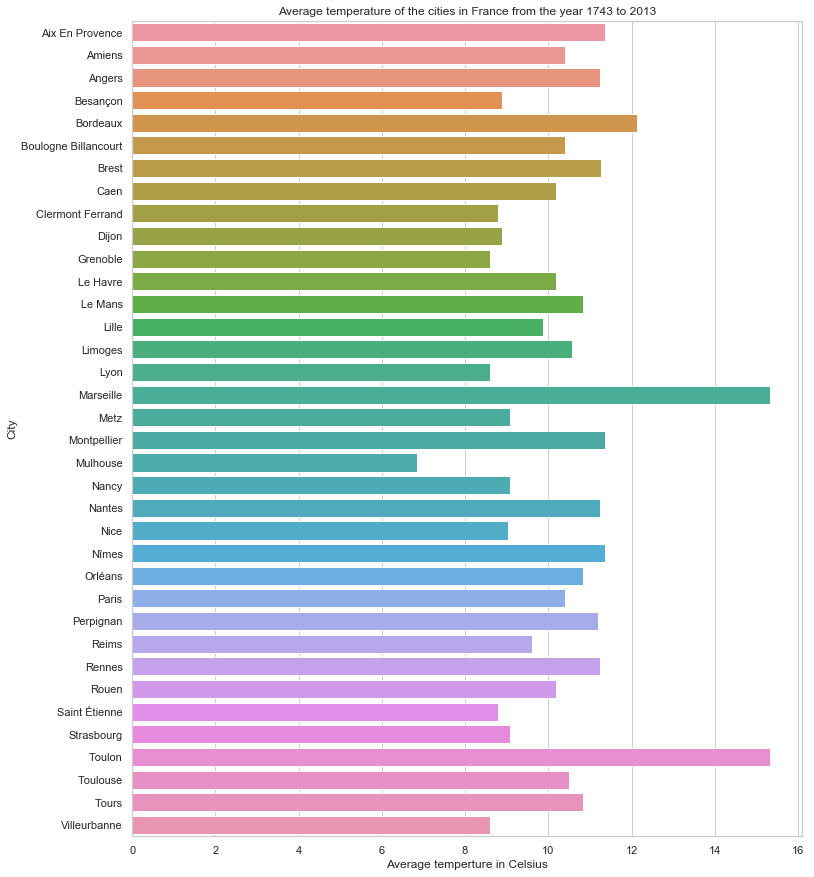

In [103]:
cities = np.unique(fr_tempdata['City'])

avgtemp = pd.DataFrame(columns=['City','AverageTemperature'])

for city in cities:
    avgtempbyyear = fr_tempdata[fr_tempdata['City'] == city]['AverageTemperature'].mean()
    avgtemp = avgtemp.append({'City' : city , 'AverageTemperature' : avgtempbyyear} , ignore_index=True)
                     
plt.subplots(figsize=(12,15))                     
ax = sns.barplot(x='AverageTemperature', y='City', data=avgtemp)
ax.set_title('Average temperature of the cities in France from the year 1743 to 2013')
ax.set_xlabel('Average temperture in Celsius')                   

The above plot is derived from the 'GlobalTemperaturesByCity.csv'. From the dataset,a list of cities in France is retreived and average temperature in all these cities is found. From the plot, Marseille and Toulon have high average temperature(more than 15)

## EDF of Natural Disasters data

In [104]:
# Load the natural disaster dataset and store it in a dataframe
original_data = pd.read_csv('number-of-natural-disaster-events.csv')
nat_disaster_df = original_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [69]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

# Check the different types of 'Entity' values
print(nat_disaster_df['Entity'].unique())

# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
print(nat_disaster_df.head())

['All natural disasters' 'Drought' 'Earthquake' 'Extreme temperature'
 'Extreme weather' 'Flood' 'Impact' 'Landslide' 'Mass movement (dry)'
 'Volcanic activity' 'Wildfire']
Entity  All natural disasters  Drought  Earthquake  Extreme temperature  \
Year                                                                      
1900                      5.0      2.0         NaN                  NaN   
1901                      2.0      NaN         2.0                  NaN   
1902                      9.0      NaN         3.0                  NaN   
1903                      8.0      1.0         1.0                  NaN   
1904                      2.0      NaN         1.0                  NaN   

Entity  Extreme weather  Flood  Impact  Landslide  Mass movement (dry)  \
Year                                                                     
1900                1.0    1.0     NaN        NaN                  NaN   
1901                NaN    NaN     NaN        NaN                  NaN   
1902 

In [70]:
# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')

nat_disaster_df.head()

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


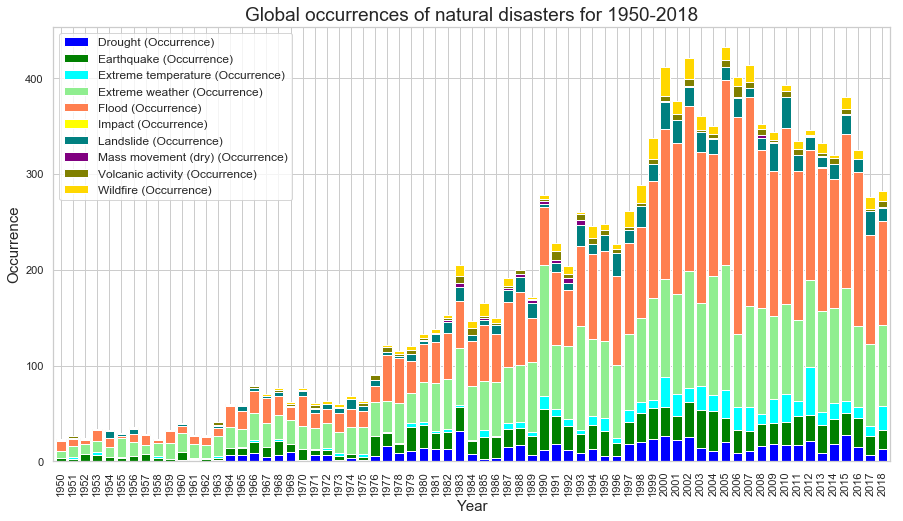

In [71]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['blue', 'green', 'cyan', 'lightgreen', 'coral', 'yellow', 'teal', 'purple', 'olive','gold']

nat_disaster_df.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()


The above chart represents the number of occurences of natural disasters from the year 1950 to 2015. The occurence rate of disasters has increased rapidly after the 1998. It can be due to the impact of climate change and other factors. The occurrence of floods has significantly increased over the years relative to other disasters. The next highest increase in occurrence is the extreme weather followed by earthquakes.

In [79]:
globaltemp = globaltemp[['dt', 'LandAndOceanAverageTemperature']]
globaltemp['dt'] = pd.to_datetime(globaltemp['dt'])
globaltemp.set_index('dt', inplace = True)
globaltemp.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
globaltemp = globaltemp.resample('A').mean()
globaltemp.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
globaltemp.index.rename('Year', inplace = True)
globaltemp.index = globaltemp.index.year

In [84]:
# Check the number of missing values and the corresponding years
print(globaltemp.isnull().sum())
print(globaltemp[globaltemp['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='Year')


In [85]:
# Calculate the global baseline temperature
global_ref_temp = globaltemp.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
globaltemp['Temperature Anomaly'] = globaltemp['AnnualAverageTemp'] - global_ref_temp
globaltemp.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

globaltemp.head()

,Temperature Anomaly
Year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN


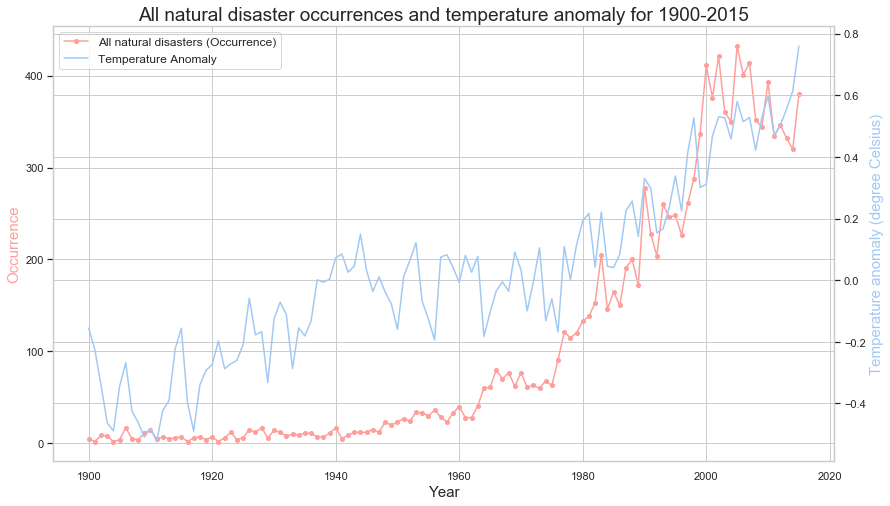

In [86]:
#Plot of all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(globaltemp.loc[1900:, 'Temperature Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

In above plot, temperature anomaly is the temperature pattern deviating from the absolute temperature. It indicates how much warmer or cooler it is than the baseline. The baseline used here is the average temperature over the 30 year period 1951-1980.
The above plot indicates a positive correlation between temperature anomaly and the occurrence of natural disasters. Also, after the year 1940 when there is an increase in global temperature than the normal, natural disasters also started rising globally.

In [87]:
# Load the economic damage dataset and store it in a dataframe
econ_dmg_df = pd.read_csv('economic-damage-from-natural-disasters.csv')
econ_dmg_df.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [88]:
# Remove the 'Code' column
econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
econ_dmg_df.drop(['Impact'], axis = 1, inplace = True)
#Remove the unwanted columns and fill in the missing values
econ_dmg_df.fillna(value = 0, inplace = True)
econ_dmg_df = econ_dmg_df.add_suffix(' (Economic Damage)')

econ_dmg_df.head()

Entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
combined_df = globaltemp.join([nat_disaster_df, econ_dmg_df], how = 'inner')
combined_df.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
correlation_table = combined_df.corr()

# Correlation with respect to temperature anomaly
combined_df.corr()['Temperature Anomaly']

Temperature Anomaly                        1.000000
All natural disasters (Occurrence)         0.865128
Drought (Occurrence)                       0.750086
Earthquake (Occurrence)                    0.796451
Extreme temperature (Occurrence)           0.738191
Extreme weather (Occurrence)               0.848536
Flood (Occurrence)                         0.841740
Impact (Occurrence)                        0.172103
Landslide (Occurrence)                     0.772180
Mass movement (dry) (Occurrence)           0.257074
Volcanic activity (Occurrence)             0.669120
Wildfire (Occurrence)                      0.683839
All natural disasters (Economic Damage)    0.647406
Drought (Economic Damage)                  0.515849
Earthquake (Economic Damage)               0.346882
Extreme temperature (Economic Damage)      0.294110
Extreme weather (Economic Damage)          0.588786
Flood (Economic Damage)                    0.678628
Landslide (Economic Damage)                0.353444
Mass movemen

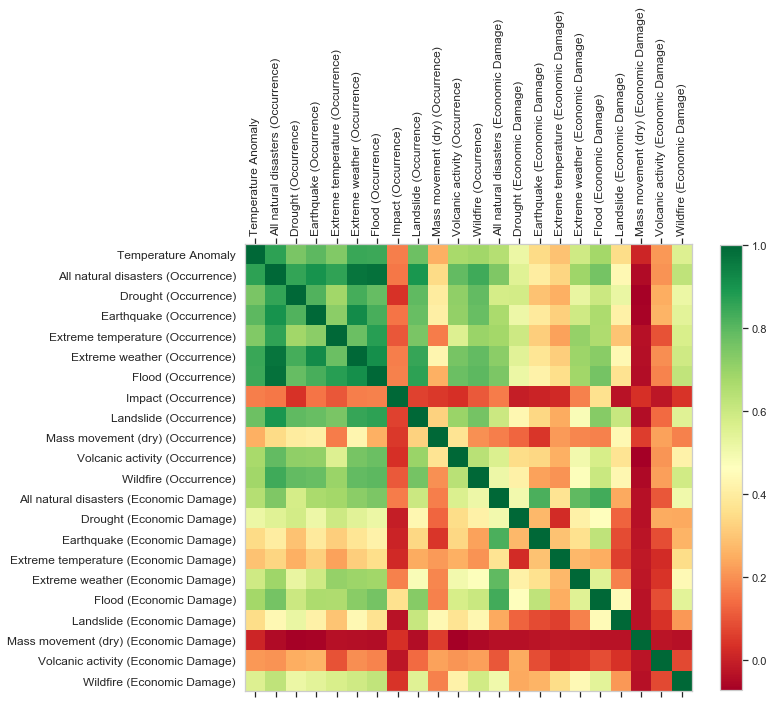

In [92]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]
cax = ax.matshow(correlation_table, cmap = 'RdYlGn')
cbar = fig.colorbar(cax, shrink = 0.82)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)
plt.show()

The datasets 'GlobalTemperatures', 'OccurencesOfNaturalDisaster' and 'EconomicDamage' are combined to see the correlation between each set.

In the correlation matrix, a value of 1.0 implies perfect positive correlation, -1.0 implies perfect negative correlation and 0 means no correlation between the two entities.

The above correlation heatmap shows that the climate change(temperature anamoly in the graph) has positive correlation with all the disaster events. Thus it proves that the climate change is one of main reasons of the occurences of natural disasters which leads to huge economic damage.